In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numba

from fastenv import FastSupplyChain
from tqdm import tqdm


plt.rcParams['figure.dpi'] = 256
plt.rcParams['text.usetex'] = True

In [2]:
batch_size = int(1e4)
time_length = 100

chain = FastSupplyChain('setups/test.pkl', batch_size=batch_size, time_length=time_length)

for i in tqdm(range(time_length)):
    action = np.random.poisson(10.0, size=(batch_size, 12))
    chain.step(action)


Loaded setups/test.pkl:

num_nodes = 9
num_edges = 12
nodes = [0 1 2 3 4 5 6 7 8]
edges = [[8 8 7 7 6 6 5 4 4 3 2 1]
 [6 5 5 4 3 2 2 3 2 1 1 0]]
inv_init = [ 4. 12. 10.  7.  8.  6.  0.  3. 10.]
prod_cost = [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.  0. ]
prod_time = [0 2 3 4 2 1 4 0 0]
node_hold_cost = [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.   0.  ]
prod_capacity = [inf inf inf inf inf inf inf inf inf]
inv_capacity = [inf inf inf inf inf inf inf inf inf]
trans_time = [ 0  2  1  0 12 11  9 10  8  3  5  2]
cost = [0.2  0.07 0.05 0.15 0.8  0.75 0.7  0.8  1.   1.6  1.5  2.  ]
edge_hold_cost = [0.    0.002 0.005 0.    0.004 0.007 0.005 0.006 0.008 0.015 0.01  0.1  ]
prod_yield = [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
node_inv: 2.74658203125 MB
edge_inv: 7.32421875 MB
node_profits: 0.34332275390625 MB
record_node_profits: 0.0034332275390625 MB
record_node_inv: 0.0274658203125 MB
record_edge_inv: 0.0732421875 MB
record_actions: 0.00457763671875 MB


100%|██████████| 100/100 [00:01<00:00, 51.43it/s]


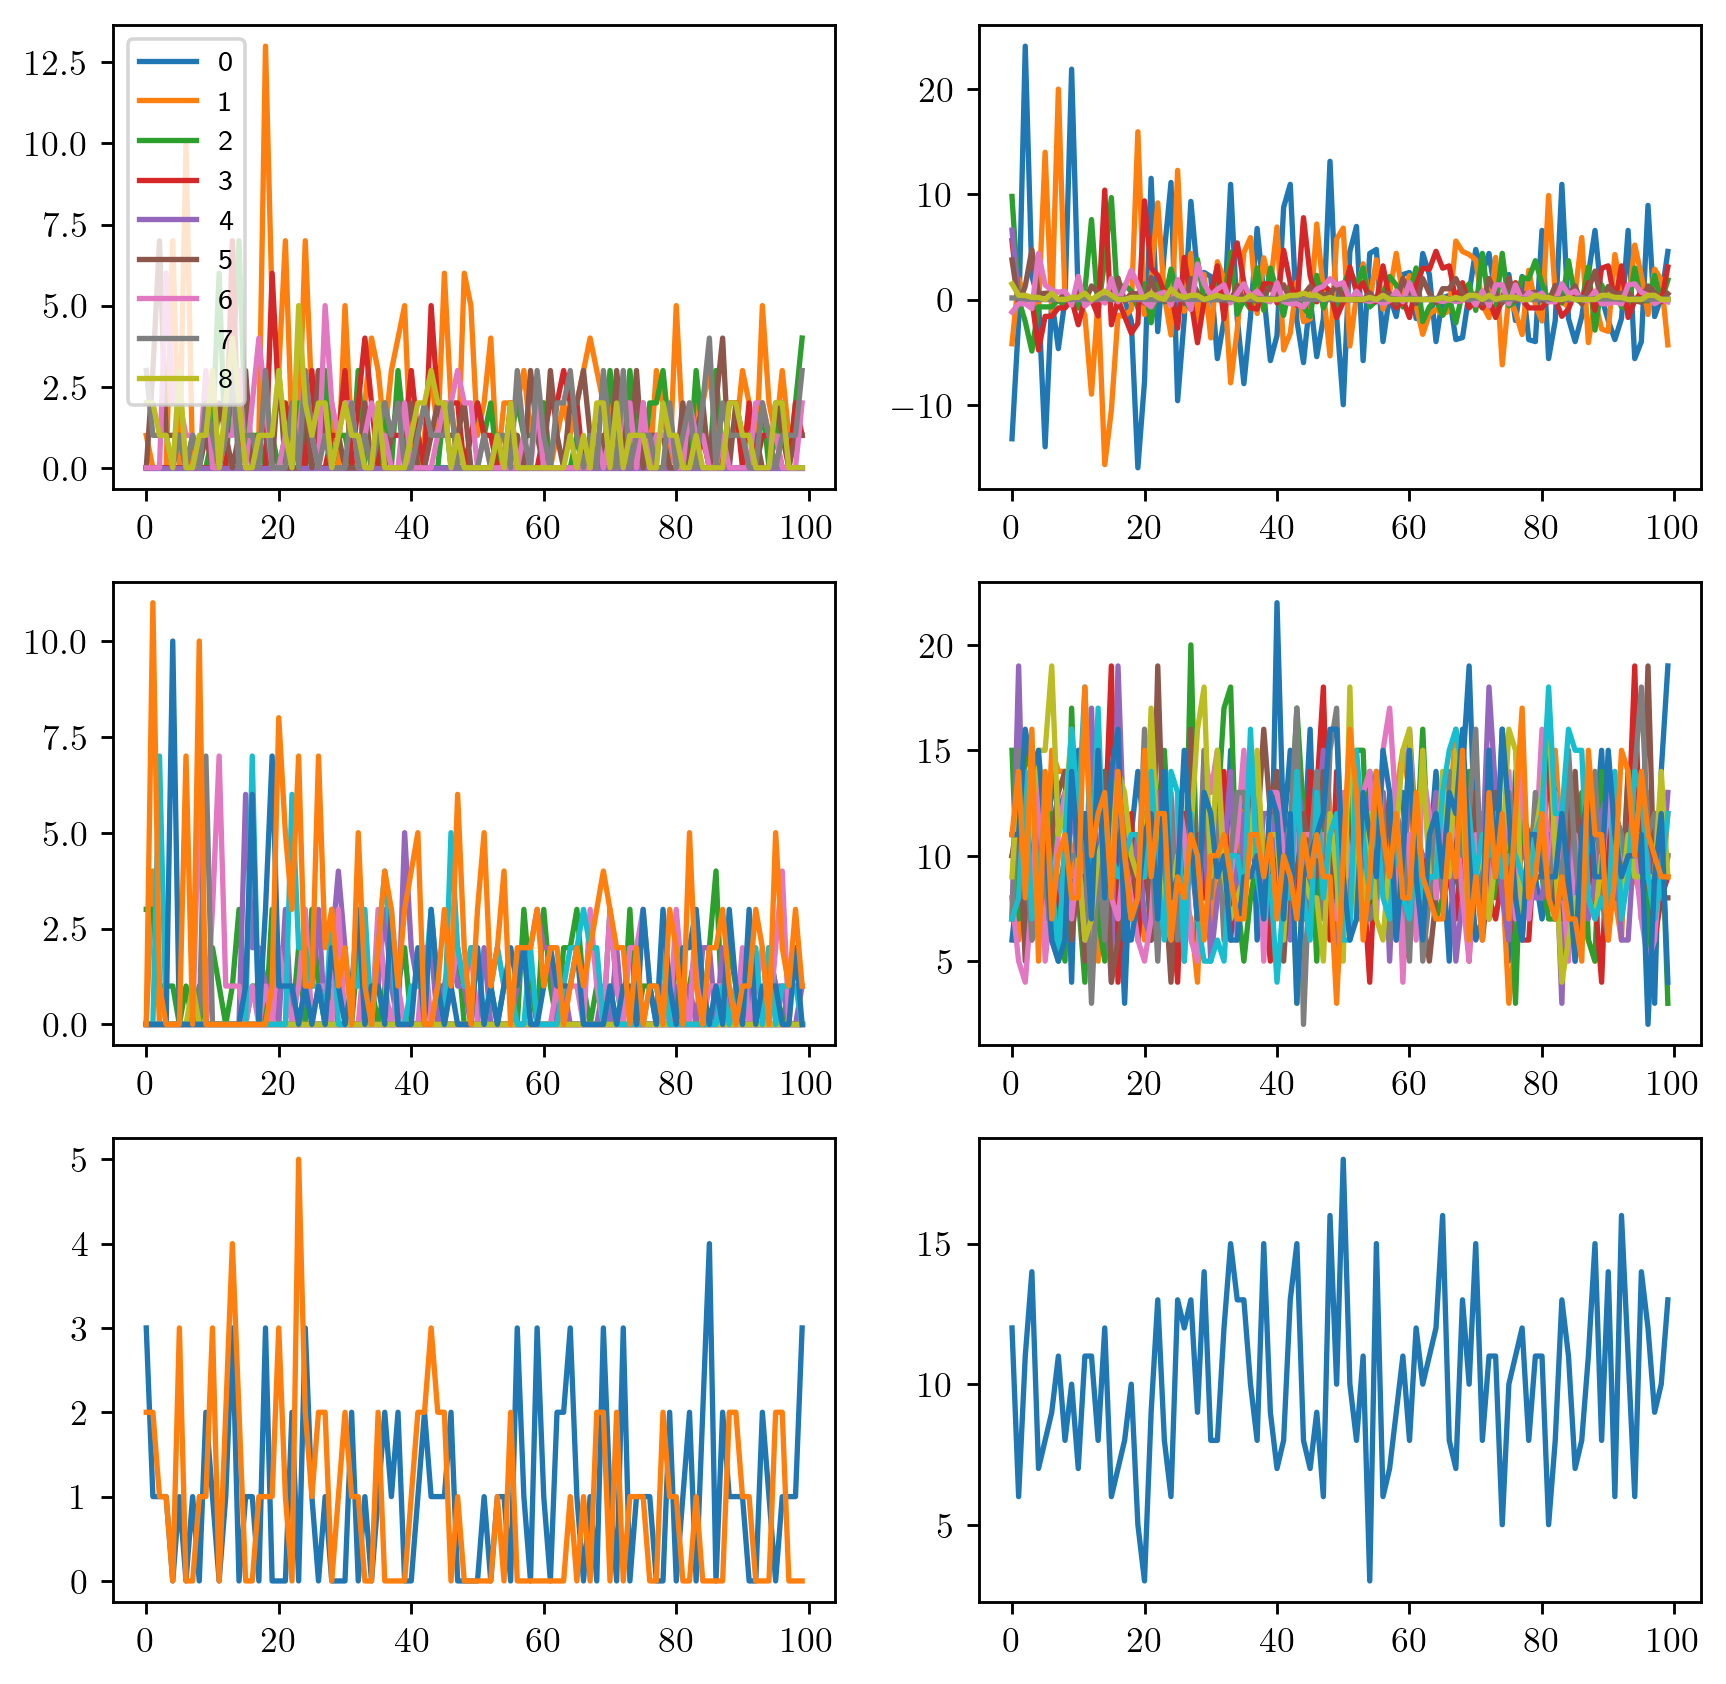

In [3]:
fig, ax = plt.subplots(ncols=2, nrows=3)
fig.set_size_inches(8, 8)

for k in range(chain.num_nodes):
    node = chain.nodes[k]
    ax[0,0].plot(chain.record_node_inv[0,k,0,:], label=node)
    ax[0,1].plot(chain.record_node_profits[0,k,:], label=node)

for k in range(chain.num_edges):
    edge = chain.edges[:,k]
    ax[1,0].plot(chain.record_edge_inv[0,k,0,:], label=edge)
    ax[1,1].plot(chain.record_actions[0,k,:])

for k in range(len(chain.supply_nodes)):
    node = chain.supply_nodes[k]
    ax[2,0].plot(chain.supply[k])

for k in range(len(chain.demand_nodes)):
    node = chain.demand_nodes[k]
    ax[2,1].plot(chain.demand[k])

ax[0,0].legend(fontsize=8)

fig.savefig('test.png')
#fig.show()